# Graduate Admission

### Hi I have been working in Machine Learning from past one year. This is my first project working with Text Data. I have been working with Image Data more

### Idea behind this project is to create a model and deploy on Heroku, which will help you get idea how machine learning product can be used End-To-End.

### Dataset Link and details: https://www.kaggle.com/mohansacharya/graduate-admissions

### In this notebook, you will get basic idea of what are the steps for developing Machine Learning Model

### Feel free to reach out to me: 
- Email- satish.fulwani63@gmail.com
- Github - https://github.com/satishf889

### Below are the useful links that will help you understand Heatmap used in this notebook
  - https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410

### Import All Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Load the dataset

In [2]:
graduation_data=pd.read_csv("data/Admission_Predict_Ver1.1.csv")
graduation_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Understanding and visualising data

In [3]:
#Getting all the information of our dataset
graduation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
#We will find out mean,max,count of all the columns in our dataframe
graduation_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### As we can see Serial number is independent column so we will remove Serial Number

In [5]:
graduation_data.drop(['Serial No.'],axis=1,inplace=True)

#Now we will be declare features and output
feature_X=graduation_data.drop(['Chance of Admit '],axis=1)
feature_Y=graduation_data['Chance of Admit ']

In [6]:
feature_X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


#### As we can see that values of feature are very high so it is good practice to normalize the data

In [7]:
#Initialize sklearn MinMaxScalar
scaler =MinMaxScaler()
feature_to_normalize=feature_X.values
normalized_feature=scaler.fit_transform(feature_to_normalize)
# Create dataframe of normalized feature
df_normalized = pd.DataFrame(normalized_feature)
df_normalized.columns=feature_X.columns

### Data after normalization

In [8]:
df_normalized.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


### Visualize data after normalization

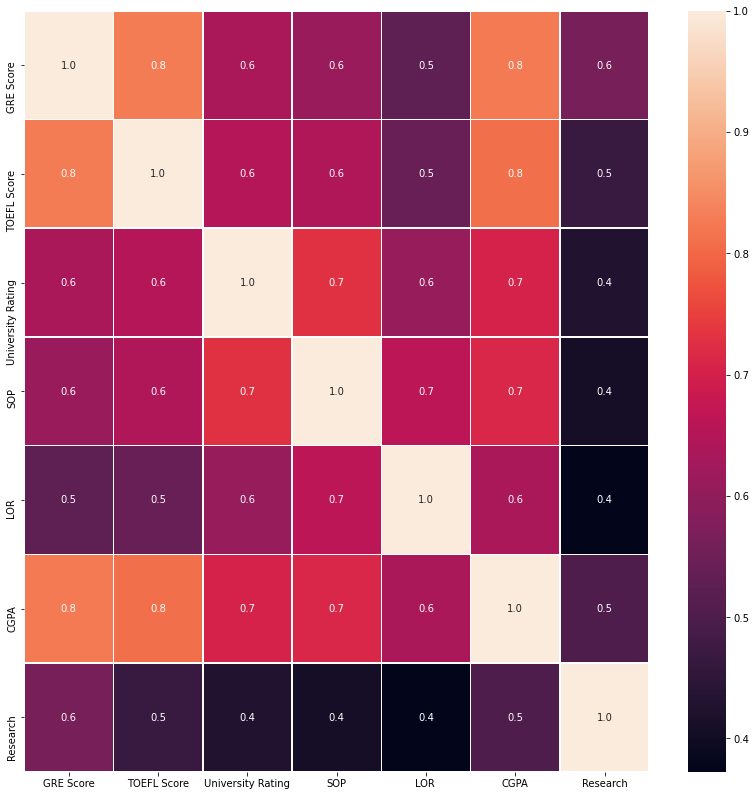

In [9]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_normalized.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### As from the above figure we can see that correlation coeffient of GRE Score, TOEFL Score and CGPA is same so we can keep one feature and remove other two

In [10]:
df_normalized.drop(['TOEFL Score','CGPA'],axis=1,inplace=True)

### Now our data is ready to be processed 

In [11]:
x=df_normalized
y=feature_Y

### Spliting the data in Train and Test Set

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,shuffle='false')

### Creating Models
#### We will be creating various models and will be using 'Mean Square Error' as measure of Accuracy

### Using Linear Regressor

In [13]:
model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)

prediction=model_LR.predict(X_test)
print(f"Mean Square Error using Linear Regressor is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Linear Regressor is 0.07277584913755047


### Using DecisionTree

In [14]:
from sklearn.tree import DecisionTreeRegressor

model_DT=DecisionTreeRegressor()
model_DT.fit(X_train,Y_train)

prediction=model_DT.predict(X_test)
print(f"Mean Square Error using Decison Tree is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Decison Tree is 0.09211405973031478


### Using RandomForestRegressor

In [15]:
model_RF=RandomForestRegressor()
model_RF.fit(X_train,Y_train)

prediction=model_RF.predict(X_test)
print(f"Mean Square Error using RandomForestRegressor is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using RandomForestRegressor is 0.07531282411045039


### Using Kneighbors

In [16]:
model_KN=KNeighborsRegressor()
model_KN.fit(X_train,Y_train)

prediction=model_KN.predict(X_test)
print(f"Mean Square Error using Kneighbors is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using Kneighbors is 0.07778483142618488


### Using SVR

In [17]:
model_SVR=SVR()
model_SVR.fit(X_train,Y_train)
prediction=model_SVR.predict(X_test)
print(f"Mean Square Error using SVR is {(np.sqrt(mean_squared_error(Y_test, prediction)))}")

Mean Square Error using SVR is 0.07882943583482654


### Step 6:Conclusion
#### Model with minimum 'Mean Square Error' is best fit for our data. So we would be using Linear Regresser with 0.7 Error

### We have to use this model for prediction, so we would store our model using pickle.

#### Pickle Details: https://docs.python.org/3/library/pickle.html

In [47]:
import pickle
# print(os.listdir())
filename='admission_model.pkl'
pickle.dump(model_LR, open("./Model/"+filename, 'wb'))